In [46]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sn
import random

In [3]:
#Loading data
dataset = pd.read_csv('churn_data.csv')
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
#more information about data
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [4]:
# checking and removing NaN
dataset.isna().any()
dataset.isna().sum()
dataset = dataset[pd.notnull(dataset['age'])]

In [5]:
dataset = dataset.drop(columns= ['credit_score', 'rewards_earned'])



In [6]:
# removing not useful columns
dataset2 = dataset.drop(columns=['user','churn'])

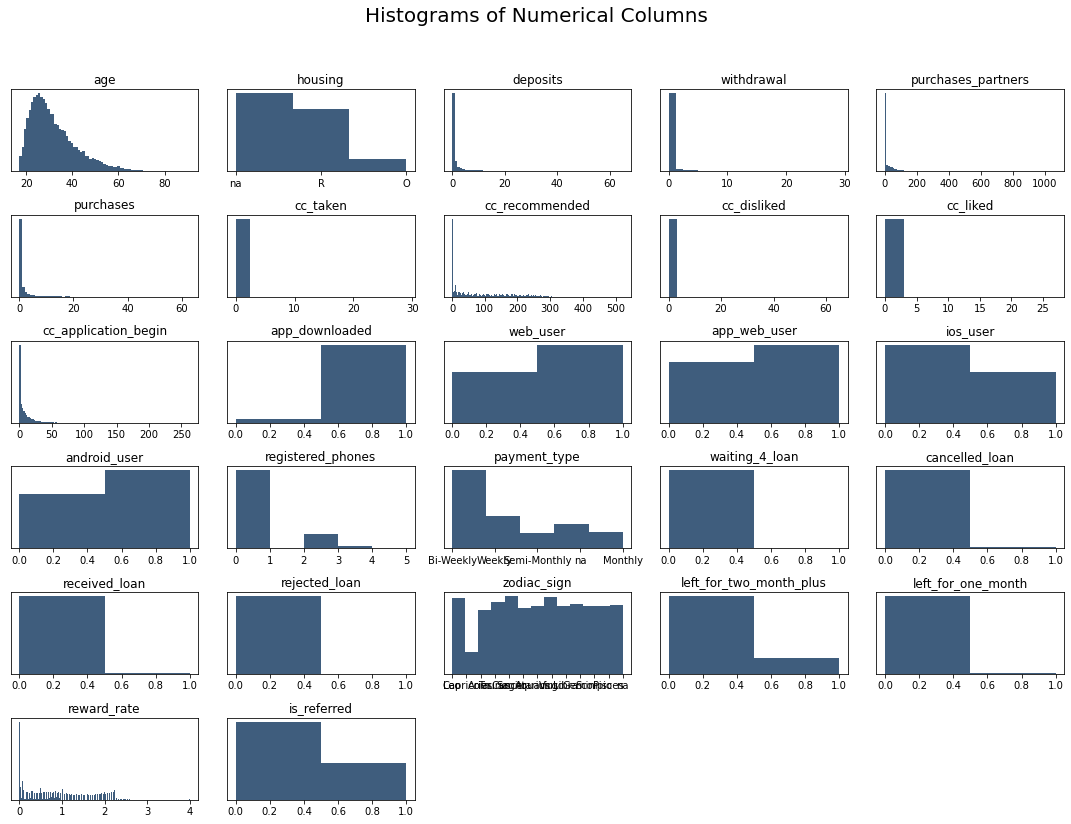

In [7]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] +1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


<ipython-input-32-8f81412fd1ea>:19: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels=index, autopct='%1.1f')


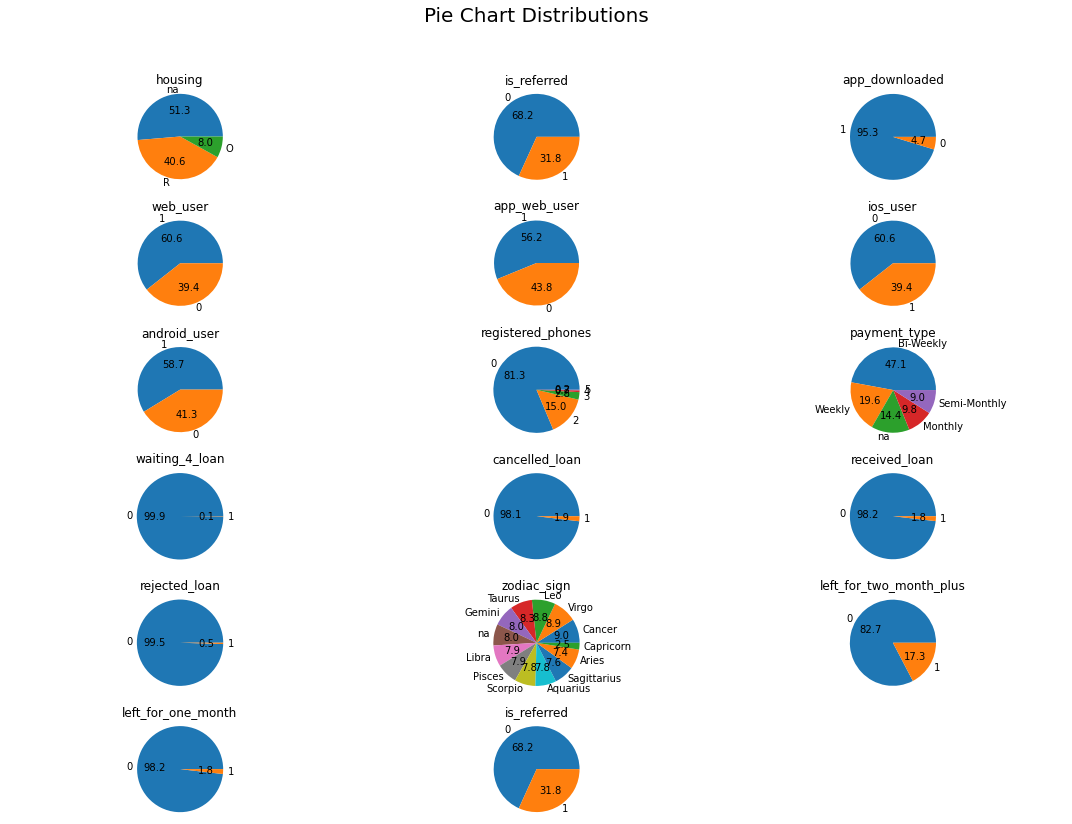

In [32]:
# Pie Chart
## Creating a dataset for binary columns
dataset2 = dataset[[ 'housing', 'is_referred', 'app_downloaded',
                     'web_user', 'app_web_user', 'ios_user',
                     'android_user', 'registered_phones', 'payment_type',
                     'waiting_4_loan', 'cancelled_loan',
                     'received_loan', 'rejected_loan', 'zodiac_sign',
                     'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] +1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize= True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize= True).index
    plt.pie(values, labels=index, autopct='%1.1f')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [33]:
dataset[dataset2.waiting_4_loan == 1 ].churn.value_counts()


0    27
1     8
Name: churn, dtype: int64

In [34]:
dataset[dataset2.cancelled_loan == 1 ].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [35]:
dataset[dataset2.received_loan == 1 ].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [36]:
dataset[dataset2.rejected_loan == 1 ].churn.value_counts()


1    107
0     25
Name: churn, dtype: int64

In [37]:
dataset[dataset2.left_for_one_month == 1 ].churn.value_counts()


1    266
0    222
Name: churn, dtype: int64

<AxesSubplot:title={'center':'Correlation with the response variable'}>

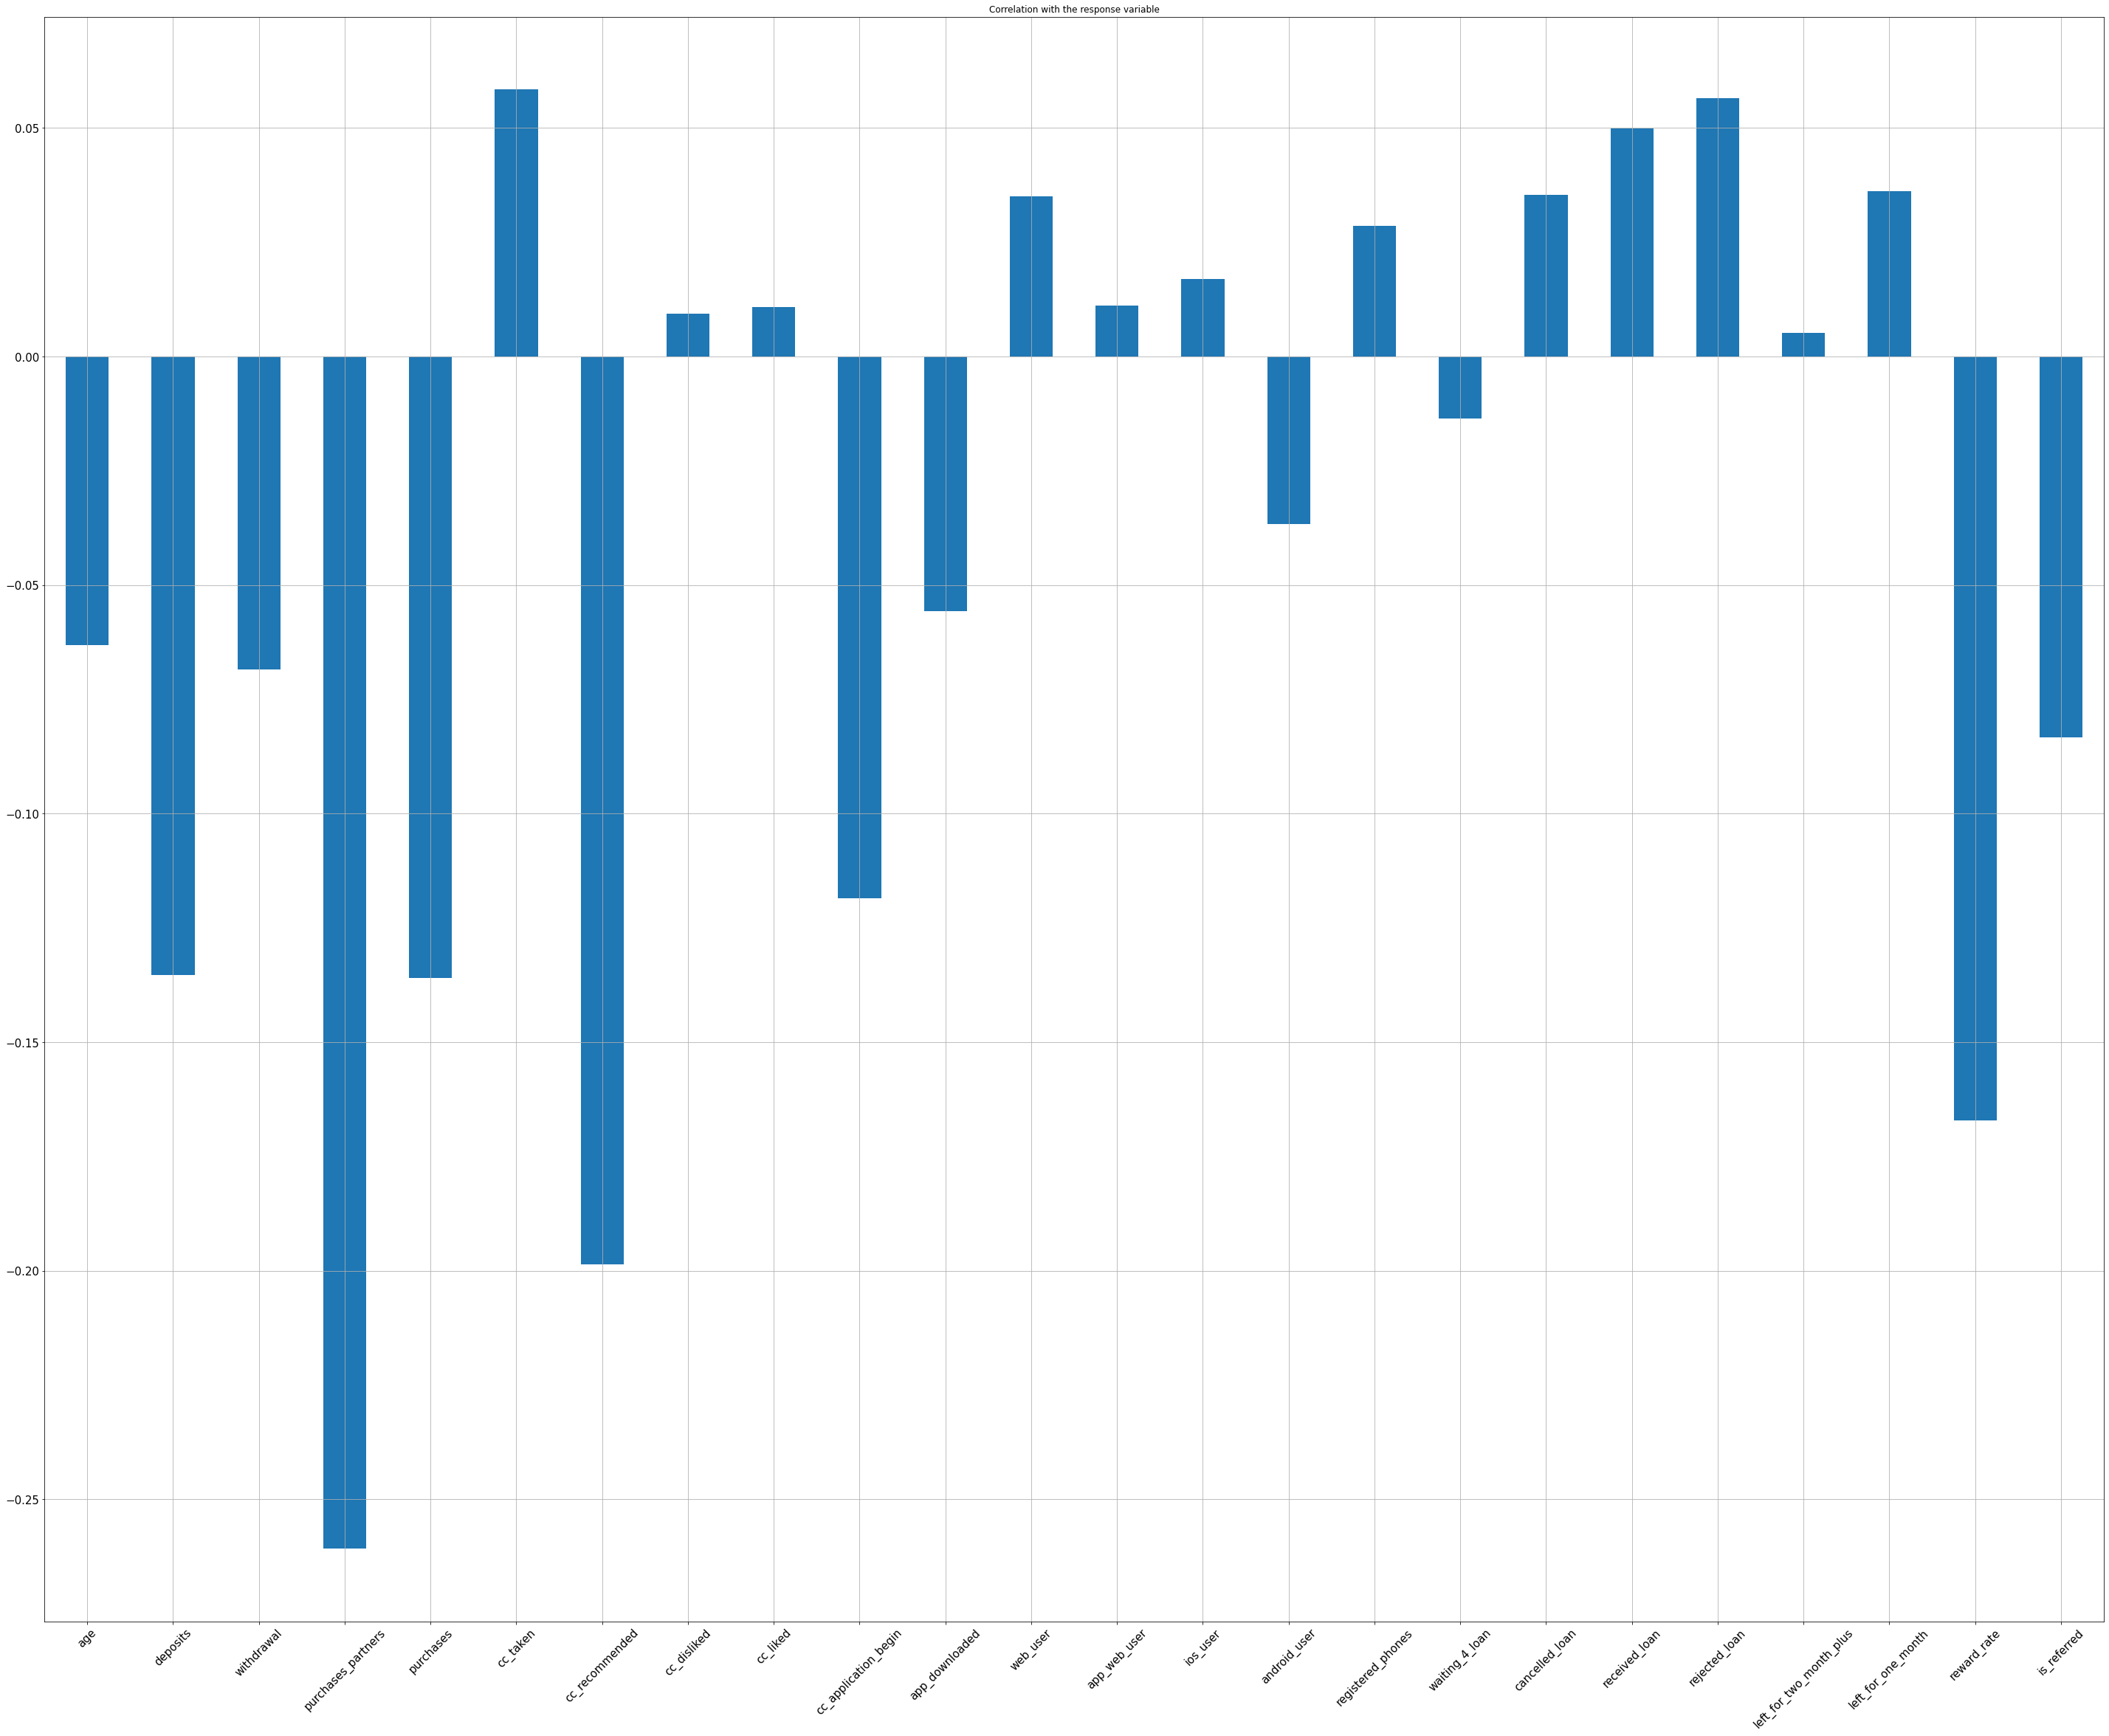

In [39]:
dataset.drop(columns= ['churn', 'user', 'housing',
                        'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
    figsize = (50, 40), title = 'Correlation with the response variable', fontsize = 15, rot=45, grid = True
                        )


<AxesSubplot:>

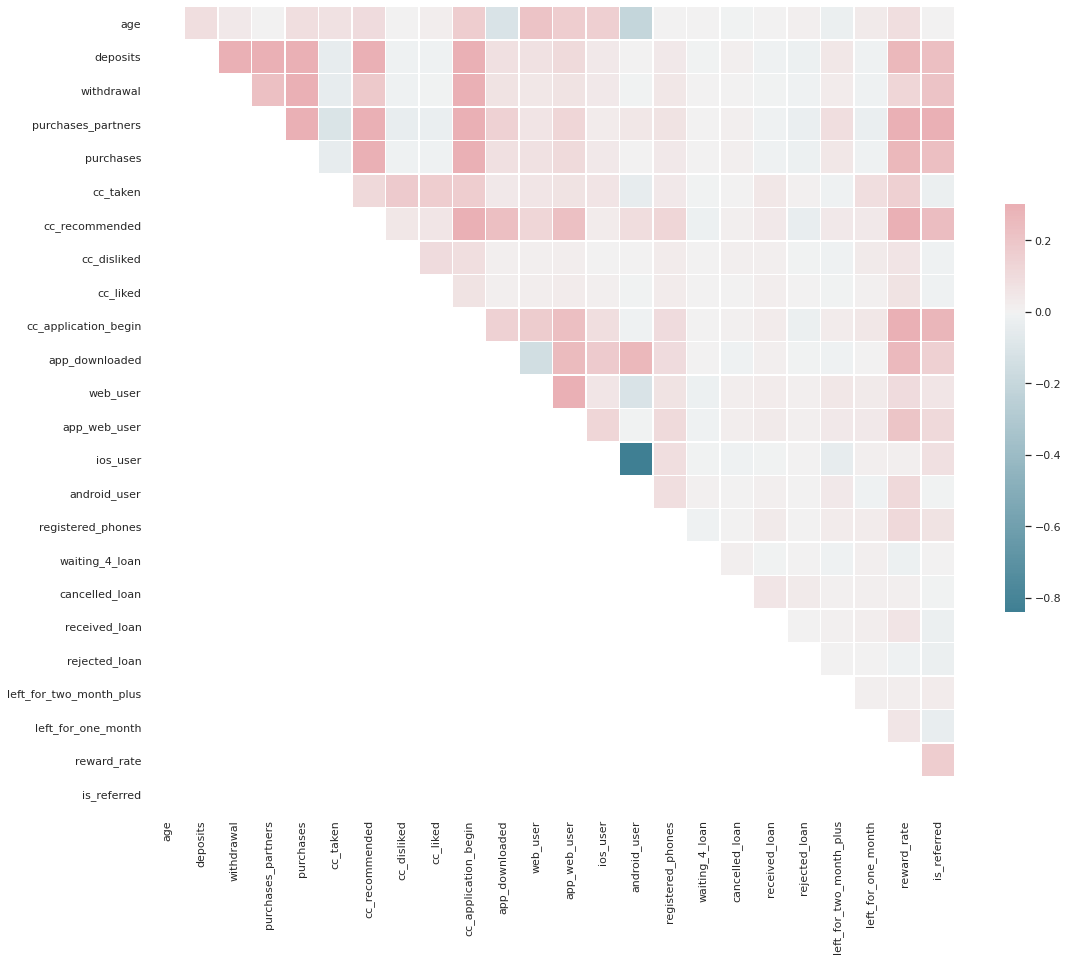

In [41]:
#correlation matrix
sn.set(style="white")

#compute the correlation matrix
corr = dataset.drop(columns= ['user','churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr,mask=mask, cmap=cmap, vmax=.3,center=0,
           square=True,linewidths=.5, cbar_kws={"shrink": .5})

In [43]:
dataset= dataset.drop(columns = ['app_web_user'])

KeyError: "['app_web_user'] not found in axis"

In [45]:
dataset.to_csv('new_churn_data.csv', index = False)

In [55]:
dataset = pd.read_csv('new_churn_data.csv')

In [56]:
## Data preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns= ['user'])


In [57]:
#One-Hot Encoding
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [58]:
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns= ['housing_na',
                                 'zodiac_sign_na', 'payment_type_na'])



In [59]:
# Splitting the dataset into the training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'),
                                                    dataset['churn'],
                                                    test_size= 0.2,
                                                    random_state= 0)